In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
import numpy as np
import pymc as pm
import arviz as az

In [2]:
with pm.Model():
    x = pm.Normal("x", mu=0, sigma=1, shape=3)
samples = pm.draw(x,100000)

array([[<Axes: title={'center': 'x'}>]], dtype=object)

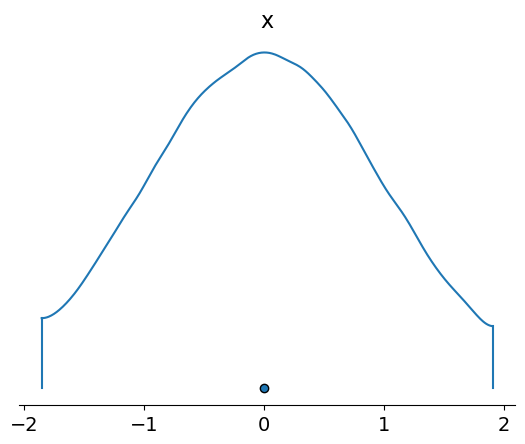

In [3]:
az.plot_density(samples[:, 0])

In [4]:
W = np.zeros((3,3)).astype('float')
W = np.array([[0,1,0],
              [1,0,1],
              [0,1,0]]).astype('float')


with pm.Model() as ICAR_model:
    sigma = 0.5
    phi = pm.ICAR("phi", W=W, sigma=1)
    mu = sigma*phi
    y_obs = pm.Normal('y_obs', mu=mu, sigma=1, observed=samples)

In [5]:
with ICAR_model:
    ICAR_idata = pm.sample(tune=100,
                          draws=1000,
                          chains=2,
                          random_seed=42,
                          discard_tuned_samples=True,
                          nuts_sampler='nutpie',
                          store_divergences=True,
                          progressbar=True)

Progress,Draws,Divergences,Step Size,Gradients/Draw
,1100,0,0.36,7
,1100,0,0.47,1


---

In [29]:
with pm.Model() as CAR_model:
    tau = pm.HalfNormal("tau", sigma=1)
    alpha = pm.Uniform("alpha", lower=0, upper=1)
    phi = pm.CAR("phi", mu=np.zeros(3), W=W, tau=1, alpha=alpha)
    mu = tau*phi

In [ ]:
# sample from the model priors
# Use the PyTensor flag `exception_verbosity=high` for a debug print-out of any errors

data = pm.Normal.sample
with ICAR_model:
    ICAR_idata = pm.sample()
#with CAR_model:
    #CAR_prior = pm.sample_prior_predictive(samples=500)

Sampling: [phi, sigma]


NotImplementedError: Cannot sample from ICAR prior
Apply node that caused the error: icar_rv{"(m,m),(),()->(m)"}(RNG(<Generator(PCG64) at 0x7FC311290820>), NoneConst{None}, [[0 1 0] [ ... ] [0 1 0]], 1, 0.001)
Toposort index: 1
Inputs types: [RandomGeneratorType, <pytensor.tensor.type_other.NoneTypeT object at 0x7fc337044f10>, TensorType(int64, shape=(3, 3)), TensorType(int8, shape=()), TensorType(float64, shape=())]
Inputs shapes: ['No shapes', 'No shapes', (3, 3), (), ()]
Inputs strides: ['No strides', 'No strides', (24, 8), (), ()]
Inputs values: [Generator(PCG64) at 0x7FC311290820, None, 'not shown', array(1, dtype=int8), array(0.001)]
Outputs clients: [[output[2](icar_rv{"(m,m),(),()->(m)"}.0)], [output[0](phi)]]

Backtrace when the node is created (use PyTensor flag traceback__limit=N to make it longer):
  File "/mnt/b1/lucaratzinger/miniconda3/envs/p-dengue-py311/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3701, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_4162559/2917371392.py", line 7, in <module>
    phi = pm.ICAR("phi", W=W, sigma=1)
  File "/mnt/b1/lucaratzinger/miniconda3/envs/p-dengue-py311/lib/python3.11/site-packages/pymc/distributions/distribution.py", line 540, in __new__
    rv_out = cls.dist(*args, **kwargs)
  File "/mnt/b1/lucaratzinger/miniconda3/envs/p-dengue-py311/lib/python3.11/site-packages/pymc/distributions/multivariate.py", line 2462, in dist
    return super().dist([W, sigma, zero_sum_stdev], **kwargs)
  File "/mnt/b1/lucaratzinger/miniconda3/envs/p-dengue-py311/lib/python3.11/site-packages/pymc/distributions/distribution.py", line 609, in dist
    return cls.rv_op(*dist_params, size=create_size, **kwargs)
  File "/mnt/b1/lucaratzinger/miniconda3/envs/p-dengue-py311/lib/python3.11/site-packages/pymc/distributions/multivariate.py", line 2344, in __call__
    return super().__call__(W, sigma, zero_sum_stdev, size=size, **kwargs)
  File "/mnt/b1/lucaratzinger/miniconda3/envs/p-dengue-py311/lib/python3.11/site-packages/pytensor/tensor/random/op.py", line 334, in __call__
    return new_op.__call__(
  File "/mnt/b1/lucaratzinger/miniconda3/envs/p-dengue-py311/lib/python3.11/site-packages/pymc/distributions/multivariate.py", line 2344, in __call__
    return super().__call__(W, sigma, zero_sum_stdev, size=size, **kwargs)

HINT: Use the PyTensor flag `exception_verbosity=high` for a debug print-out and storage map footprint of this Apply node.